In [1]:
# Import packages
import os
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# Load data from Map Biomas
filename = os.path.join(os.getcwd(), 'data', 'map_biomas.csv')
map_biomas = pd.read_csv(filename)
print('Source: https://plataforma.brasil.mapbiomas.org/desmatamento')

Source: https://plataforma.brasil.mapbiomas.org/desmatamento


In [3]:
# Data peek
map_biomas.head()

,Classe,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,1. Supressão de Vegetação Primária,NaN,7308931.0,6432726.0,5749646.0,4921199.0,4792157.0,5116605.0,4571184.0,4867557.0,...,2329397.0,2437064.0,2365136.0,2141748.0,2259905.0,2985170.0,2941241.0,3409599.0,3608005.0,2480731.0
1,1.1. Floresta,NaN,6723628.0,5810057.0,5242827.0,4439531.0,4356501.0,4751490.0,4190514.0,4502152.0,...,2109021.0,2193583.0,2165033.0,1954219.0,2058063.0,2725613.0,2711295.0,3170734.0,3162386.0,2038847.0
2,1.1.1. Formação Florestal,NaN,3074682.0,2967556.0,2674975.0,2291187.0,2351491.0,2614981.0,2322106.0,2579252.0,...,1014571.0,1170809.0,1254275.0,1124934.0,1190931.0,1642475.0,1532716.0,1947928.0,1757370.0,1054127.0
3,1.1.2. Formação Savânica,NaN,3501307.0,2685421.0,2429000.0,2021684.0,1893975.0,1973838.0,1708745.0,1770029.0,...,1063703.0,981859.0,847806.0,783036.0,824480.0,1032410.0,1131745.0,1133865.0,1333468.0,922039.0
4,1.1.3. Mangue,NaN,36.0,175.0,118.0,56.0,214.0,73.0,69.0,31.0,...,86.0,115.0,288.0,140.0,31.0,36.0,35.0,37.0,111.0,28.0


In [4]:
# Get values from 1987 onwards
sup_df = map_biomas.drop(['Classe', '1986'], axis=1)
sup_df = sup_df.iloc[[0, 14]]
sup_df = sup_df.T
sup_df.columns = ['Primary', 'Secondary']
sup_df.head()

,Primary,Secondary
1987,7308931.0,NaN
1988,6432726.0,NaN
1989,5749646.0,112426.0
1990,4921199.0,206150.0
1991,4792157.0,379203.0


In [5]:
# Keep only total values
sup_df['Total'] = sup_df['Primary'].fillna(0) + sup_df['Secondary'].fillna(0)
sup_df = sup_df.drop(['Primary', 'Secondary'], axis=1)
sup_df.head()

,Total
1987,7308931.0
1988,6432726.0
1989,5862072.0
1990,5127349.0
1991,5171360.0


In [6]:
# Data statistics
sup_df.describe()

,Total
count,3.700000e+01
mean,4.942553e+06
std,1.055523e+06
min,3.398804e+06
25%,3.915846e+06
50%,5.171360e+06
75%,5.612367e+06
max,7.308931e+06


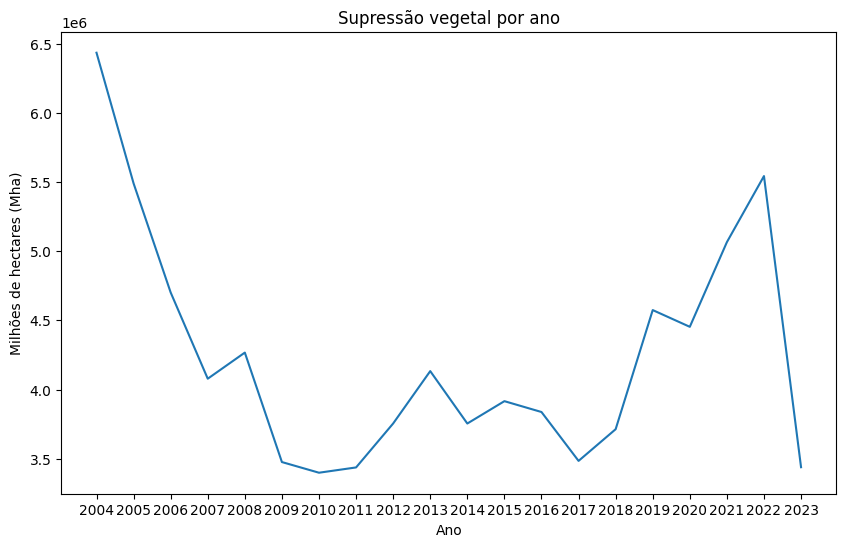

In [7]:
# Plot suppression evolution for the last 20 years
sup_df_20 = sup_df[-20:]
plt.figure(figsize=(10, 6))
plt.plot(sup_df_20)
plt.title('Supressão vegetal por ano')
plt.xlabel('Ano')
plt.ylabel('Milhões de hectares (Mha)')
plt.show()

In [8]:
# Load data queimadas
filename = os.path.join(os.getcwd(), 'data', 'queimadas.xlsx')
wildfires = pd.read_excel(filename)
print('Source: https://terrabrasilis.dpi.inpe.br/queimadas/portal/')

Source: https://terrabrasilis.dpi.inpe.br/queimadas/portal/


In [9]:
# Data peek
wildfires.head()

,ano,meses,focos
0,1999,1,1081
1,1999,2,1284
2,1999,3,667
3,1999,4,717
4,1999,5,1811


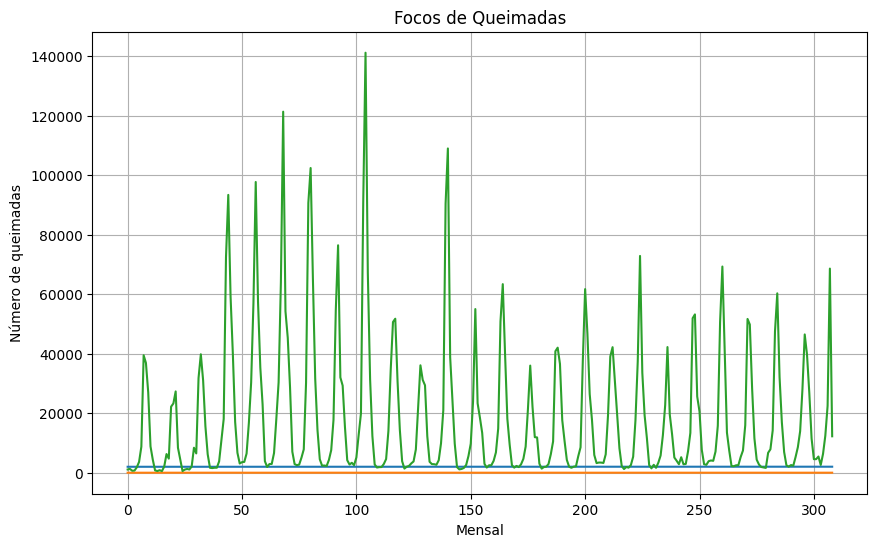

In [10]:
# Plot values
plt.figure(figsize=(10, 6))
plt.plot(wildfires)
plt.title('Focos de Queimadas')
plt.xlabel('Mensal')
plt.ylabel('Número de queimadas')
plt.grid(True)
plt.show()

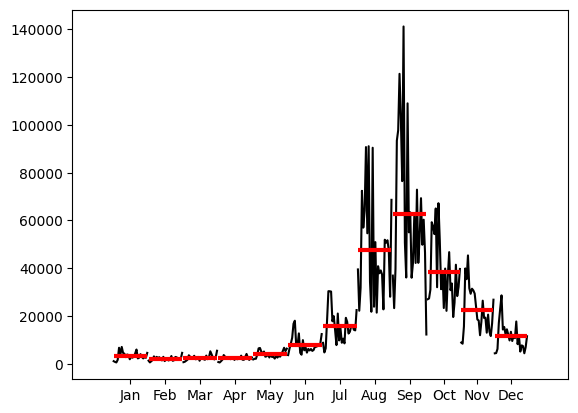

In [18]:
# Plot monthly values
wildfires_monthly = pd.Series(wildfires['focos'].values, index=pd.date_range(start='1999-01-01', periods=len(wildfires), freq='ME'))
sm.graphics.tsa.month_plot(wildfires_monthly)
plt.show()